<a href="https://colab.research.google.com/github/shejalbendre/Data-Analytics-Intermediate-Level-Task-2/blob/main/Intermediate_Level_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**LetsGrowMore**

**Author - Shejal Sanjay Bendre**

**Data Science Intern**

**Intermediate Level Task 2- Prediction using Decision Tree Algorithm**

Importing Libraries




In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

Read the Dataset

In [ ]:
iris = pd.read_csv(r'/content/sample_data/Iris .csv')

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Data Visualization & EDA

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


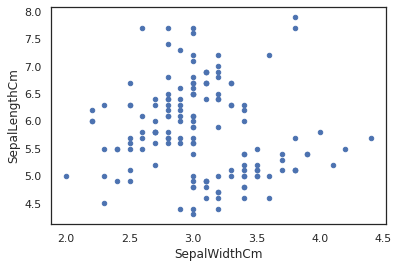

In [ ]:
sns.set(style='white', color_codes=True)
iris.plot(kind='scatter',x='SepalWidthCm', y='SepalLengthCm')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


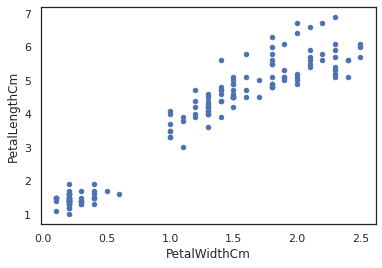

In [ ]:
iris.plot(kind='scatter',x='PetalWidthCm', y='PetalLengthCm')

In [ ]:
iris = iris.drop(['Id'],axis=1)

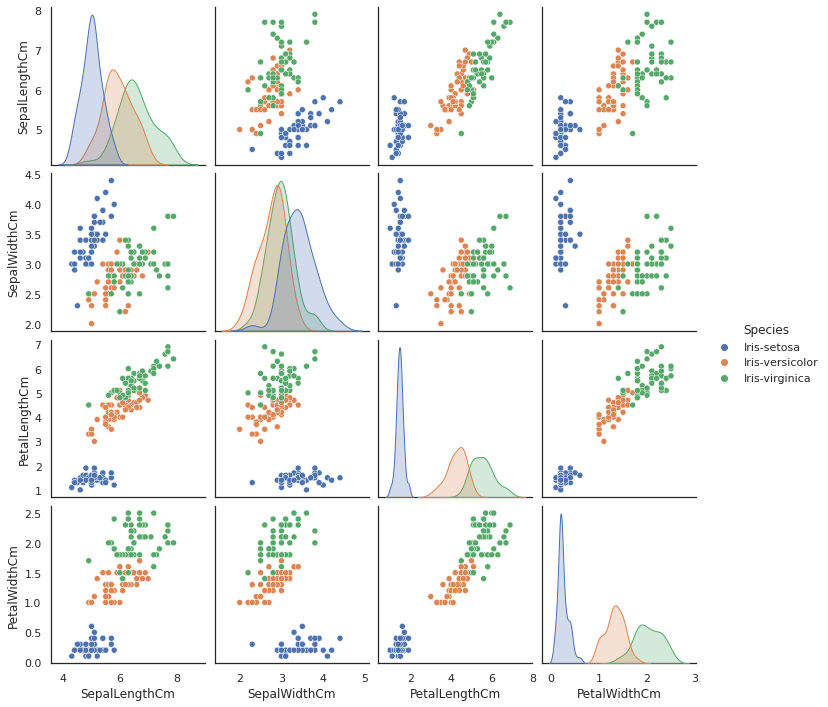

In [ ]:
sns.pairplot(data=iris, hue='Species')

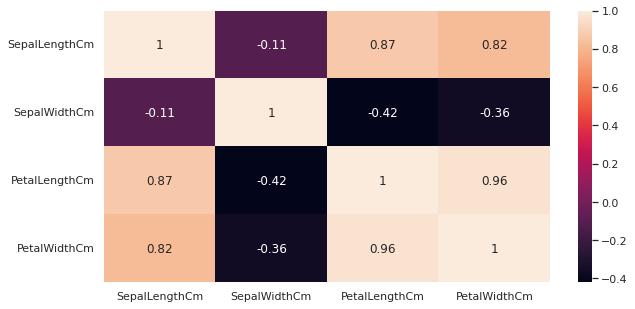

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = iris.drop(['Species'], axis=1)
y = iris['Species']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=150)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()


In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
prediction = dtree.predict(X_test)


In [ ]:
df = pd.DataFrame({'Real': y_test, 'Prediction': prediction})
df.head()


,Real,Prediction
53,Iris-versicolor,Iris-versicolor
42,Iris-setosa,Iris-setosa
141,Iris-virginica,Iris-virginica
83,Iris-versicolor,Iris-virginica
60,Iris-versicolor,Iris-versicolor


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn import tree

In [ ]:
print(accuracy_score(y_test,prediction)*100)

95.55555555555556


Decision Tree

[Text(0.375, 0.9166666666666666, 'Petal Width <= 0.75\ngini = 0.665\nsamples = 105\nvalue = [33, 34, 38]\nclass = Virginica'),
 Text(0.25, 0.75, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]\nclass = Setosa'),
 Text(0.5, 0.75, 'Petal Length <= 4.75\ngini = 0.498\nsamples = 72\nvalue = [0, 34, 38]\nclass = Virginica'),
 Text(0.25, 0.5833333333333334, 'Petal Width <= 1.65\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]\nclass = Versicolor'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Versicolor'),
 Text(0.375, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(0.75, 0.5833333333333334, 'Petal Length <= 5.05\ngini = 0.097\nsamples = 39\nvalue = [0, 2, 37]\nclass = Virginica'),
 Text(0.625, 0.4166666666666667, 'Sepal Length <= 6.5\ngini = 0.32\nsamples = 10\nvalue = [0, 2, 8]\nclass = Virginica'),
 Text(0.5, 0.25, 'Sepal Width <= 3.1\ngini = 0.198\nsamples = 9\nvalue = [0, 1, 8]\nclass = Virginica'),
 Tex

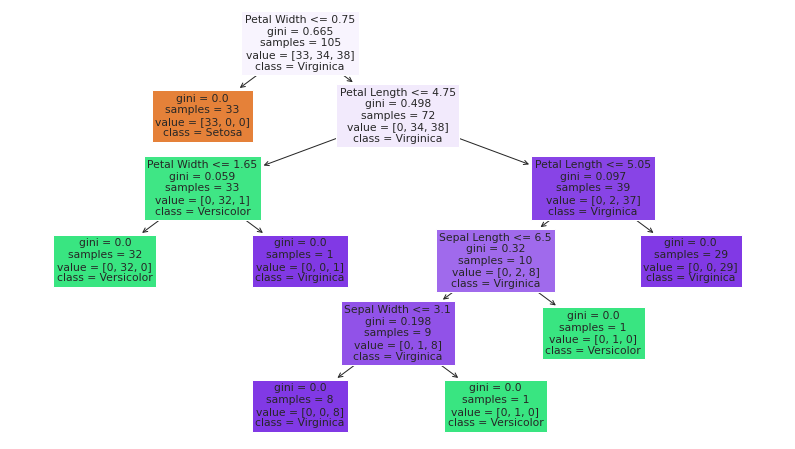

In [ ]:
plt.figure(figsize=(14,8))
dimen_arr = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]
flow_arr = ["Setosa", "Versicolor", "Virginica"]
plot_tree(dtree,feature_names = dimen_arr, class_names = flow_arr , filled = True)

[Text(0.5, 0.9166666666666666, 'Petal Length <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = Setosa'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = Setosa'),
 Text(0.5769230769230769, 0.75, 'Petal Width <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = Versicolor'),
 Text(0.3076923076923077, 0.5833333333333334, 'Petal Length <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = Versicolor'),
 Text(0.15384615384615385, 0.4166666666666667, 'Petal Width <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = Versicolor'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = Versicolor'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(0.46153846153846156, 0.4166666666666667, 'Petal Width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(0.38461538461538464, 0.25, 'gini = 

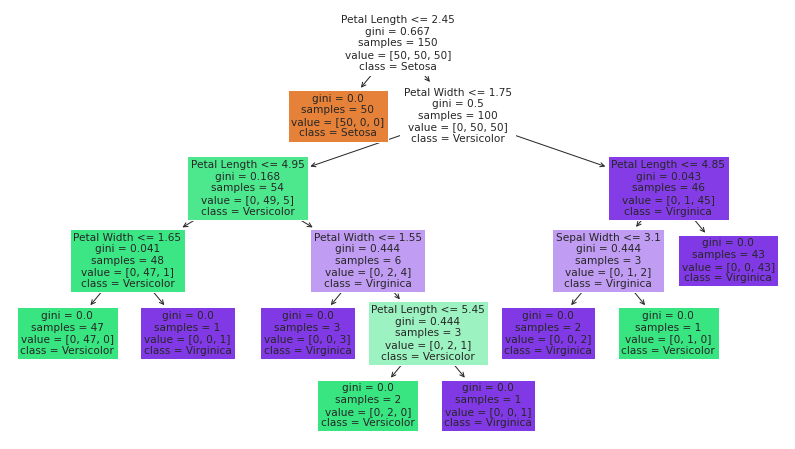

In [ ]:
model = DecisionTreeClassifier().fit(X,y)

# pred = dtree.predict([[6.1,3.2,5.3,1.4]])

plt.figure(figsize=(14,8))

plot_tree(model,feature_names = dimen_arr, class_names = flow_arr , filled = True)

**Thank You**